In [1]:
# MNIST Classification using Artificial Neural Networks (ANN)

#Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Load the MNIST dataset  (handwritten digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Normalize the data (values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the data (28x28 images to 784-dimensional vectors)
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [4]:
# Define the ANN model with one hidden layer and sigmoid activation
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  # Output layer with 10 neurons (for 10 classes)
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(x_train_flattened, y_train, epochs=5)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)

print(f"\nTest accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5


1875/1875 [==============================] - 27s 10ms/step - loss: 0.4706 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3044 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2834 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2728 - accuracy: 0.9238
Epoch 5/5
313/313 [==============================] - 4s 6ms/step - loss: 0.2684 - accuracy: 0.9232

Test accuracy: 92.32%


In [7]:
# Make predictions
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 2s 5ms/step


In [8]:
# Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

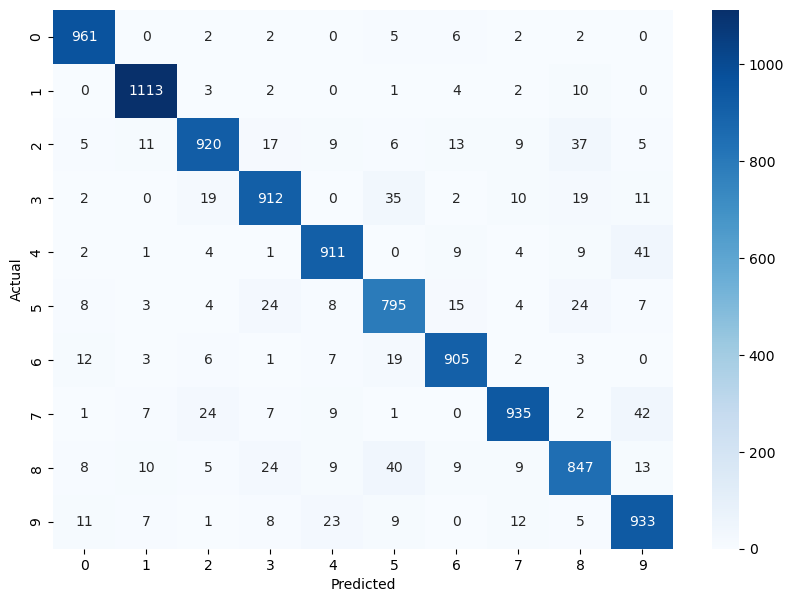

In [9]:
# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.87      0.89      0.88       892
           6       0.94      0.94      0.94       958
           7       0.95      0.91      0.93      1028
           8       0.88      0.87      0.88       974
           9       0.89      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [11]:
# Build a deeper model with multiple hidden layers and different activation functions
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  # First hidden layer with ReLU activation
    keras.layers.Dense(200, activation='relu'),                      # Second hidden layer with ReLU activation
    keras.layers.Dense(10, activation='softmax')                     # Output layer with 10 neurons and softmax
])

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
model.fit(x_train_flattened, y_train, epochs=10)

# Evaluate the updated model
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)
print(f"\nTest accuracy with deeper model: {test_accuracy * 100:.2f}%")


Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 0.2448 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1046 - accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0737 - accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0561 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0432 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0365 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0301 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0261 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0207 - accuracy: 0.9929
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss

In [14]:
# Make predictions with the updated model
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 2s 7ms/step


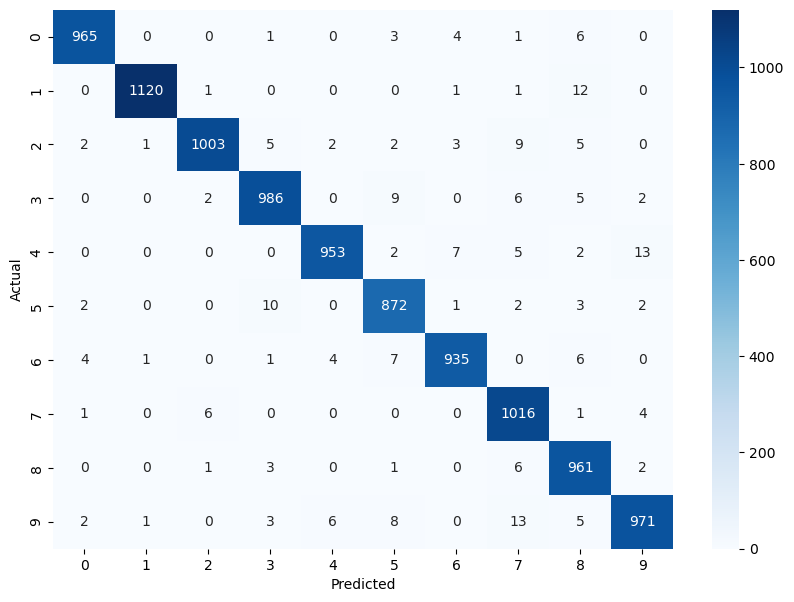

In [15]:
# Plot confusion matrix for updated model
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Print classification report for updated model
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.99      0.97      1028
           8       0.96      0.99      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

